
# **PATTERN RECOGNITION AND MACHINE LEARNING**



## Mid-term Project: Mental Attention States Classification Using EEG Data


## **GIỚI THIỆU**

Dự án này nhằm phân loại các trạng thái chú ý tinh thần—tập trung, không tập trung và buồn ngủ—dựa trên tín hiệu EEG từ thiết bị EMOTIV EEG. Dữ liệu được thu thập từ 34 thí nghiệm, bao gồm tín hiệu EEG từ các kênh 4 đến 17 với tần số mẫu 128 Hz. Các kỹ thuật học máy sẽ được áp dụng để phát triển một mô hình chính xác nhằm phát hiện các trạng thái này. Dữ liệu có sẵn [tại đây](https://www.kaggle.com/datasets/inancigdem/eeg-data-for-mental-attention-state-detection/data).

## **TỔNG QUAN VỀ PHƯƠNG PHÁP**
Để phân loại trạng thái chú ý tinh thần từ tín hiệu EEG, quá trình thường bao gồm các bước chính: xử lý tín hiệu, trích xuất đặc trưng và áp dụng thuật toán học máy. Trong bước xử lý tín hiệu, các kỹ thuật như lọc và loại bỏ nhiễu (đặc biệt là với ICA) giúp cải thiện chất lượng dữ liệu EEG. Sau đó, các đặc trưng như mật độ phổ công suất và các đặc trưng tần số được trích xuất. Cuối cùng, các thuật toán học máy như SVM, Random Forest, cùng các mô hình học sâu như CNN và RNN được sử dụng để phân loại các trạng thái chú ý, giúp cải thiện độ chính xác và hiệu quả của mô hình.

## **TECH STACKS**
* **Ngôn ngữ lập trình (Programming Languages):** Python

* **Thư viện (Libraries):** MNE, Pandas, Numpy, Scikit-Learn, Matplotlib, Seaborn

* **Môi trườnng (IDE):** Visual Studio Code, Google Colab, Jupyter Notebook

* **Công cụ trình bày (Presentation):** Canva, PowerPoint

In [1]:
"""import kagglehub
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")

print("Path to dataset files:", path)

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))"""

'import kagglehub\nfrom scipy.io import loadmat\nimport os\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n# Download latest version\npath = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")\n\nprint("Path to dataset files:", path)\n\n# Collect all file names\nfile_names = []\nfor dirname, _, filenames in os.walk(path):\n    for filename in filenames:\n        file_names.append(os.path.join(dirname, filename))'

## **DATA UNDERSTADING AND CLEANING**

## **Data understanding**

#### **Tổng quan về bộ dữ liệu EEG**

Bộ dữ liệu EEG này được thu thập trong một thử nghiệm với 5 đối tượng (subjects), trong đó mỗi đối tượng thực hiện nhiều thử nghiệm liên tiếp, với mục tiêu khảo sát các trạng thái chú ý tinh thần. Trạng thái chú ý của đối tượng được phân chia thành ba nhóm chính: **tập trung (`focussed`)**, **không tập trung (`unfocussed`)** và **buồn ngủ (`drowsed`)**. Mỗi trạng thái này được ghi nhận trong các khoảng thời gian cụ thể, như mô tả sau:

- **Trạng thái "tập trung" (`focussed`)**: Đại diện cho giai đoạn mà đối tượng thực hiện nhiệm vụ với sự chú ý cao độ. Dữ liệu EEG cho trạng thái này được thu thập trong 10 phút đầu tiên của mỗi thử nghiệm, từ thời điểm t = 0 đến t = 10 phút.
  
- **Trạng thái "không tập trung" (`unfocussed`)**: Đây là giai đoạn mà đối tượng bắt đầu mất đi sự chú ý và giảm khả năng tập trung. Thời gian của trạng thái này kéo dài từ t = 10 đến t = 20 phút trong mỗi thử nghiệm.

- **Trạng thái "buồn ngủ" (`drowsed`)**: Đây là giai đoạn mà đối tượng bắt đầu cảm thấy mệt mỏi và mất đi khả năng duy trì sự tỉnh táo. Trạng thái này được ghi nhận từ t = 20 phút trở đi cho đến hết thử nghiệm.

#### **Cấu trúc và tính toán số lượng mẫu**

Vì tần số mẫu của dữ liệu EEG là **128 Hz**, mỗi giây sẽ có 128 mẫu dữ liệu. Mỗi phút sẽ có:

* $
  \text{Số mẫu trong 1 phút} = 128 \times 60 = 7680 \text{ mẫu}
  $

Từ đó, số mẫu dữ liệu cho mỗi trạng thái chú ý có thể tính toán như sau:

- **Trạng thái "tập trung"**: 
  * $
  128 \times 10 \times 60 = 76800 \text{ mẫu}
  $
  
  Dữ liệu cho trạng thái "tập trung" được lấy từ dòng 0 đến dòng 76800.

- **Trạng thái "không tập trung"**:
  * $
  128 \times 10 \times 60 = 76800 \text{ mẫu}
  $

  Dữ liệu cho trạng thái "không tập trung" được lấy từ dòng 76800 đến dòng 153600.

- **Trạng thái "buồn ngủ"**:
  Dữ liệu cho trạng thái "buồn ngủ" sẽ được lấy từ dòng 153600 cho đến hết bộ dữ liệu.

Như vậy, mỗi thử nghiệm cho một đối tượng sẽ có tổng cộng 3 trạng thái với số dòng dữ liệu là 76800 mẫu cho mỗi trạng thái, tổng cộng là **230400 mẫu** cho một thử nghiệm. Tất cả các thử nghiệm được thực hiện trong môi trường phòng thí nghiệm, nơi các đối tượng phải hoàn thành nhiệm vụ và duy trì sự chú ý theo các trạng thái mô tả.

#### **Thông tin về đối tượng và thử nghiệm**

- **Số lượng đối tượng**: **5 đối tượng** (subjects). Mỗi đối tượng tham gia vào một loạt các thử nghiệm.
  
- **Số lượng thử nghiệm**: Mỗi đối tượng thực hiện **7 thử nghiệm** (trừ đối tượng thứ 5 chỉ thực hiện 6 thử nghiệm). Các thử nghiệm này được thực hiện trong nhiều ngày, với các đối tượng có thời gian làm quen trong **2 ngày đầu tiên**.

- **Mục đích của các thử nghiệm**: Mỗi thử nghiệm được thiết kế để khảo sát sự thay đổi trong các trạng thái chú ý của đối tượng. Các đối tượng sẽ phải thực hiện các tác vụ đòi hỏi sự tập trung cao độ, và sự thay đổi trong trạng thái chú ý của họ sẽ được ghi lại thông qua tín hiệu EEG.

- **Dữ liệu đã qua xử lý**: Dữ liệu từ các thử nghiệm được thu thập trong quá trình thí nghiệm sẽ trải qua một số bước tiền xử lý như lọc thông dải (bandpass filtering), lọc notch (notch filtering) và loại trừ các thành phần ICA gây nhiễu (như EOG, ECG) để chuẩn bị cho các phân tích sau.


## **Performance**

### **Import library**

In [52]:
# Standard library imports
import os
from os.path import join

# Third-party library imports
from scipy.io import loadmat  # Thư viện đọc file .mat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from scipy.signal import butter, filtfilt, iirnotch
import mne
from mne.preprocessing import ICA
from scipy.signal import stft

### **Load data**

In [3]:
path = '../Data'

# Thu thập tất cả tên file .mat
file_names = [
    join(dirname, filename)
    for dirname, _, filenames in os.walk(path)
    for filename in filenames
    if filename.endswith('.mat')
]
        
# Sắp xếp file theo số thứ tự (để đảm bảo đúng thứ tự subject)
file_names.sort(key=lambda x: int(x.split('eeg_record')[-1].split('.mat')[0]))

**Chỉ lấy tín hiệu từ các kênh 4-17 (là các kênh EEG chính) để phân tích:**

| Channel_names | Position      |
|---------------|---------------|
| AF3           | Trán trước    |
| AF4           | Trán trước    |
| F7            | Trán bên      |
| F8            | Trán bên      |
| F3            | Trán trái     |
| F4            | Trán phải     |
| FC5           | Trán giữa     |
| FC6           | Trán giữa     |
| T7            | Thái dương trái         |
| T8            | Thái dương phải         |
| O1            | Vùng sau đầu  |
| O2            | Vùng sau đầu  |
| P7            | Đỉnh đầu trái |
| P8            | Đỉnh đầu phải |


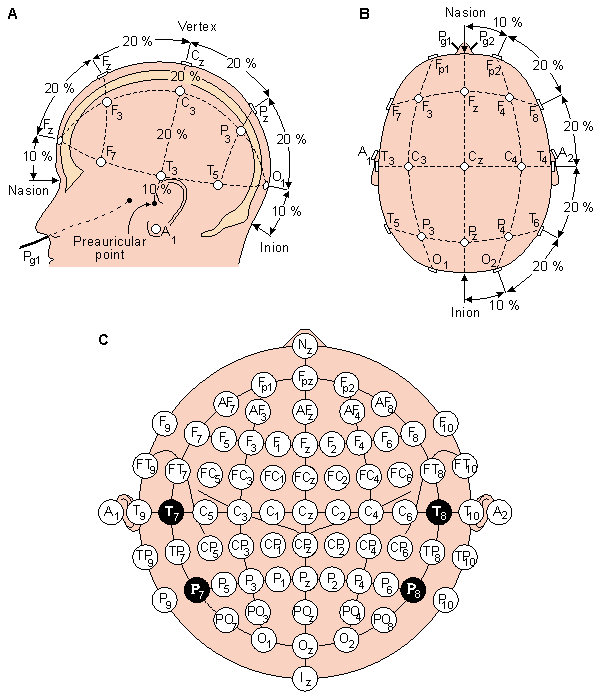

In [4]:
# Tần số mẫu của dữ liệu EEG
sampFreq = 128
# Tên các kênh cần phân tích
channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

In [5]:
# Hàm đọc dữ liệu 
def load_data(file_name):
    mat = loadmat(file_name)
    # Trích xuất dữ liệu từ đối tượng 'o'
    mdata = mat['o']
    sampFreq = int(mdata['sampFreq'][0][0][0][0])  # Tần số lấy mẫu
    data = mdata['data'][0, 0]  # Dữ liệu đầy đủ

    '''
    Dữ liệu EEG thường được ghi từ nhiều kênh (channels), ta chỉ lấy tín hiệu 
    từ các kênh 4-17 (là các kênh EEG chính) để phân tích.
    '''
    eeg_data = data[:, 3:17]

    return data, eeg_data

In [6]:
def subject_mapping(total_subjects):
    subject_map = {}
    for subject in range(1, total_subjects + 1):
        start_id = 7 * (subject - 1) + 3
        end_id = start_id + (5 if subject != total_subjects else 4)  # Subject cuối có 4 trials
        subject_map[subject] = list(range(start_id, end_id))
    return subject_map


# Chỉ xét 5 ngày cuối mỗi người 
total_subjects = 5

# Tạo subject_map
subject_map = subject_mapping(total_subjects)
print("Ánh xạ subject_map:", subject_map)


Ánh xạ subject_map: {1: [3, 4, 5, 6, 7], 2: [10, 11, 12, 13, 14], 3: [17, 18, 19, 20, 21], 4: [24, 25, 26, 27, 28], 5: [31, 32, 33, 34]}


* **Subject 1:** Tham gia từ ngày 3 đến ngày 7 (5 ngày thực tế).

* **Subject 2:** Tham gia từ ngày 10 đến ngày 14 (5 ngày thực tế).

* **Subject 3:** Tham gia từ ngày 17 đến ngày 21 (5 ngày thực tế).

* **Subject 4:** Tham gia từ ngày 24 đến ngày 28 (5 ngày thực tế).

* **Subject 5:** Tham gia từ ngày 31 đến ngày 34 (4 ngày thực tế).

In [7]:
def load_eeg_data(file_names):
    all_data = []
    # Tạo danh sách các trial_id hợp lệ từ subject_map
    valid_trial_ids = {trial_id for trial_ids in subject_map.values() for trial_id in trial_ids}
    for file_name in file_names:
        # Lấy Trial ID từ tên file
        trial_id = int(file_name.split('eeg_record')[-1].split('.mat')[0])
        # Kiểm tra xem trial_id có trong subject_map không
        if trial_id not in valid_trial_ids:
            print(f"Trial ID {trial_id} không nằm trong subject_map, bỏ qua file {file_name}.")
            continue

        try:
            print(f"Đang xử lý file: {file_name}, Trial ID: {trial_id}")
            _, eeg_data = load_data(file_name)

            # Kiểm tra kích thước dữ liệu trả về
            if eeg_data is not None and eeg_data.size > 0:
                all_data.append((eeg_data))
            else:
                print(f"Dữ liệu EEG từ file {file_name} không hợp lệ hoặc rỗng.")
        except Exception as e:
            print(f"Lỗi khi xử lý file {file_name}: {e}")
    
    return all_data

In [8]:
eeg_data = load_eeg_data(file_names)

Trial ID 1 không nằm trong subject_map, bỏ qua file ../Data\eeg_record1.mat.
Trial ID 2 không nằm trong subject_map, bỏ qua file ../Data\eeg_record2.mat.
Đang xử lý file: ../Data\eeg_record3.mat, Trial ID: 3
Đang xử lý file: ../Data\eeg_record4.mat, Trial ID: 4
Đang xử lý file: ../Data\eeg_record5.mat, Trial ID: 5
Đang xử lý file: ../Data\eeg_record6.mat, Trial ID: 6
Đang xử lý file: ../Data\eeg_record7.mat, Trial ID: 7
Trial ID 8 không nằm trong subject_map, bỏ qua file ../Data\eeg_record8.mat.
Trial ID 9 không nằm trong subject_map, bỏ qua file ../Data\eeg_record9.mat.
Đang xử lý file: ../Data\eeg_record10.mat, Trial ID: 10
Đang xử lý file: ../Data\eeg_record11.mat, Trial ID: 11
Đang xử lý file: ../Data\eeg_record12.mat, Trial ID: 12
Đang xử lý file: ../Data\eeg_record13.mat, Trial ID: 13
Đang xử lý file: ../Data\eeg_record14.mat, Trial ID: 14
Trial ID 15 không nằm trong subject_map, bỏ qua file ../Data\eeg_record15.mat.
Trial ID 16 không nằm trong subject_map, bỏ qua file ../Data\ee

## **Data Preprocessing**

### **Filter data**

Tín hiệu EEG chứa nhiều tần số khác nhau, và không phải tất cả các tần số đều có liên quan đến các hoạt động não mà chúng ta muốn phân tích.

In [9]:
# Hàm tạo bộ lọc thông cao và thông thấp
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Hàm tạo bộ lọc notch
def notch_filter(data, notch_freq, fs, quality_factor=30):
    nyquist = 0.5 * fs
    notch = notch_freq / nyquist
    b, a = iirnotch(notch, quality_factor)
    return filtfilt(b, a, data, axis=0)

- Bộ **lọc thông dải** giúp loại bỏ các nhiễu có tần số thấp (ví dụ như trôi dần của tín hiệu do chuyển động mắt, cơ hoặc các nhiễu do thiết bị đo) và các nhiễu có tần số cao (ví dụ như nhiễu từ điện thoại di động, hệ thống vi tính,...). Bộ lọc này cho phép tín hiệu EEG chỉ chứa các thành phần tần số quan trọng, giúp giảm nhiễu và cải thiện chất lượng phân tích..

- **Lọc notch** được sử dụng để loại bỏ nhiễu tần số 50 Hz (hoặc 60 Hz tùy thuộc vào khu vực địa lý). Nhiễu này thường xuất hiện do điện lưới (lưới điện nhà, bệnh viện, v.v.) và nó có thể tạo ra những dao động không mong muốn trong tín hiệu EEG.


In [10]:
def filter_data(data_set):
    # Lọc thông cao và thông thấp và lọc notch cho từng file
    filtered_all_data = []
    for data_eeg in data_set:
        # Lọc thông cao và thông thấp cho dữ liệu của file hiện tại
        lowcut = 0.5  # Hz
        highcut = 30  # Hz
        filtered_data_bandpass = bandpass_filter(data_eeg, lowcut, highcut, sampFreq)

        # Lọc notch để loại bỏ nhiễu 50 Hz cho dữ liệu đã lọc thông
        notch_freq = 50  # Hz
        filtered_data_notch = notch_filter(filtered_data_bandpass, notch_freq, sampFreq)

        # Lưu dữ liệu đã lọc vào danh sách
        filtered_all_data.append(filtered_data_notch)
    
    return filtered_all_data

In [11]:
filtered_data = filter_data(eeg_data)

In [12]:
def plot_all_channels(eeg_data_list, channel_names, title="EEG Signals for All Channels",time_range=(5000, 15000)):
    num_channels = len(channel_names)
    start, end = time_range

    # Thiết lập kích thước đồ thị
    fig, axes = plt.subplots(num_channels, 1, figsize=(20, 5 * num_channels))
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes):
        # Kết hợp và làm trung bình dữ liệu trên kênh
        combined_data = np.hstack([eeg_data[start:end, i] for eeg_data in eeg_data_list])
        normalized_data = combined_data - np.mean(combined_data)

        # Vẽ đồ thị cho từng kênh
        ax.plot(normalized_data)
        ax.set_title(channel_names[i])
        ax.set_ylim(-100,100)
        ax.set_xlabel("Samples")
        ax.set_ylabel("Amplitude")

    plt.tight_layout()  
    plt.show()


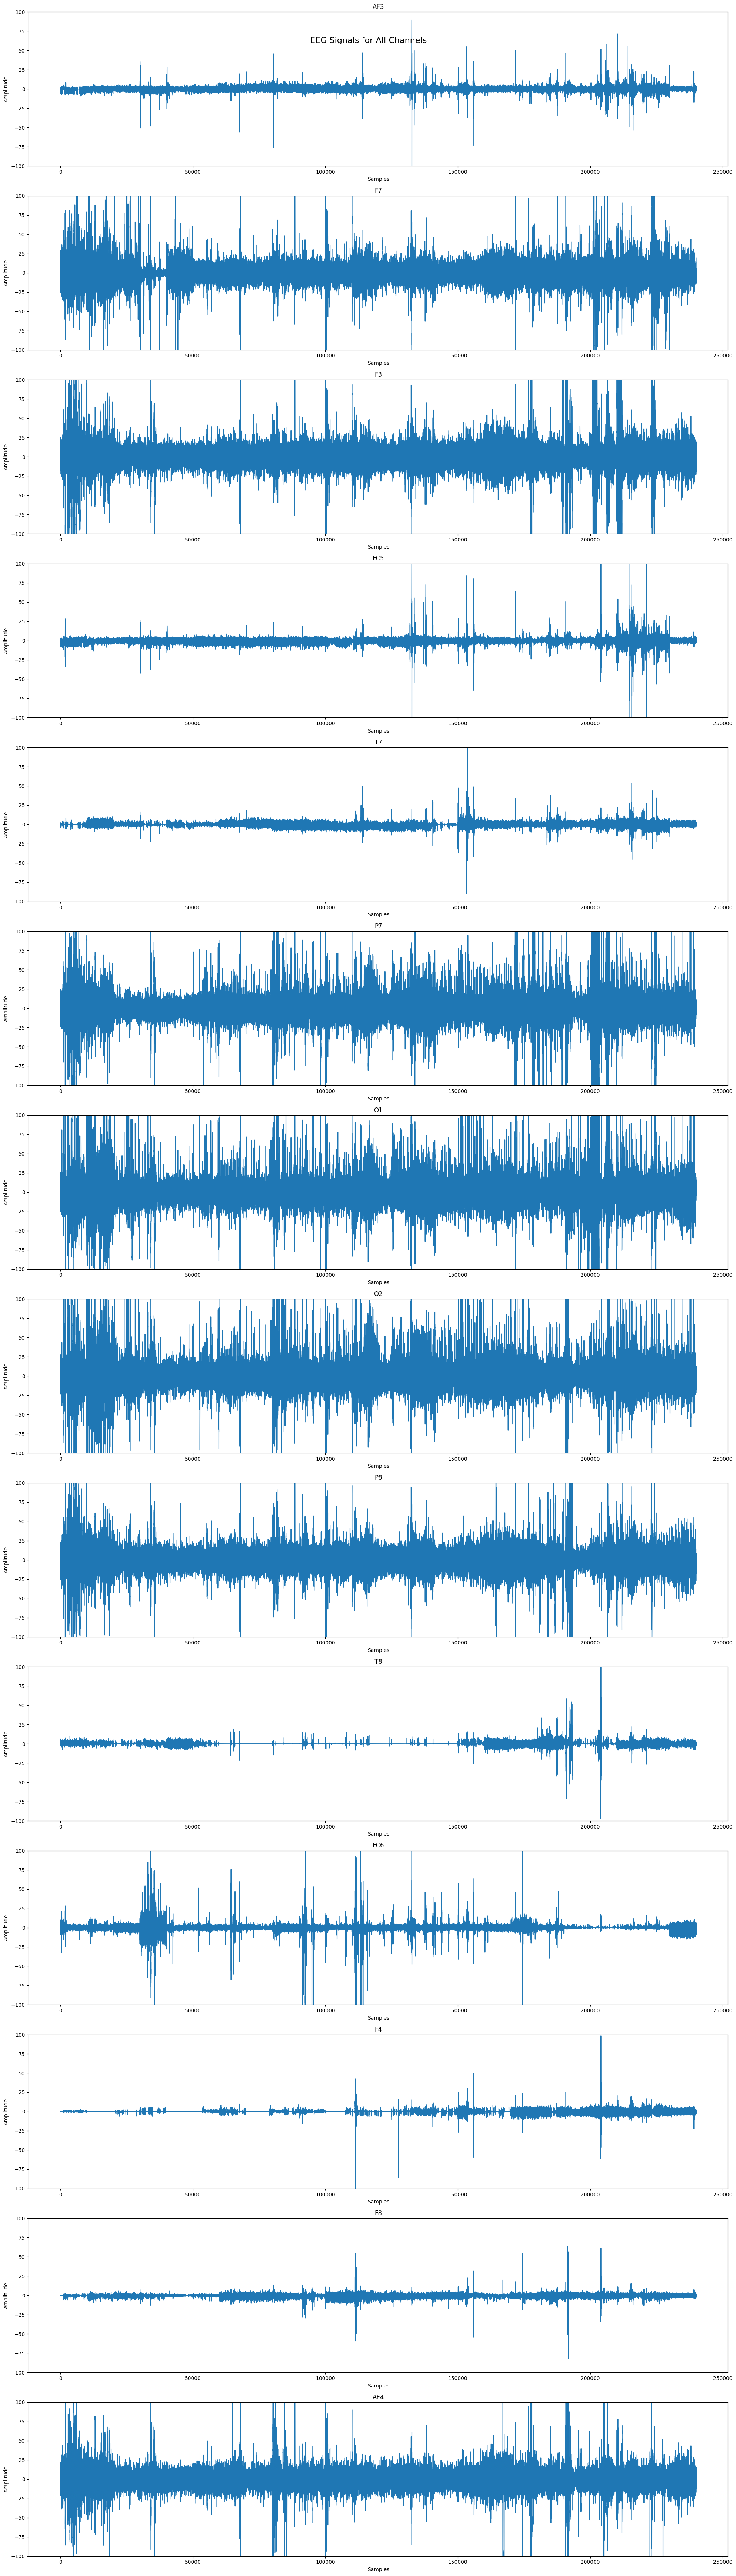

In [13]:
plot_all_channels(filtered_data, channel_names)

* Để xác định các kênh EEG phù hợp, nhóm em đã tiến hành vẽ đồ thị tín hiệu của tất cả các kênh EEG trong một khoảng thời gian nhất định. Hàm `plot_all_channels` được sử dụng để hiển thị tín hiệu từ các kênh trong khoảng thời gian này. 

* Sau khi quan sát đồ thị, nhóm em nhận thấy rằng các kênh có biên độ EEG nằm trong phạm vi từ `-100` đến `100`, sau khi loại bỏ thành phần DC, là những kênh phù hợp nhất cho việc phân tích. Dựa trên kết quả này, các kênh hữu ích được chọn bao gồm: `F7`, `F3`, `P7`, `O1`, `O2`, `P8`, và `AF4`.

In [14]:
useful_channel_idx = [1, 2, 5, 6, 7, 8, 13]
useful_channel_names = ['F7', 'F3', 'P7', 'O1', 'O2', 'P8', 'AF4']

# Điều chỉnh chỉ dùng 7 kênh ảnh hưởng
filtered_data = [eeg_data[:, useful_channel_idx] for eeg_data in filtered_data]

* **Visualize data sau khi lọc nhiễu**

In [15]:
def plot_signal(filtered_data, file_names, num_files=2):
    # Lấy trial_id từ subject_map
    trial_ids = [trial_id for ids in subject_map.values() for trial_id in ids]

    # Lấy danh sách file hợp lệ 
    valid_file_names = [file_names[trial_id - 1] for trial_id in trial_ids]

    # Duyệt qua các file cần trực quan hóa
    for idx, file_name in enumerate(valid_file_names[:num_files]):
        filtered_signal = filtered_data[idx]  # Lấy dữ liệu đã lọc tương ứng

        # Load dữ liệu gốc
        data, eeg_data = load_data(file_name)

        # Vẽ dữ liệu đầy đủ từ file
        print('Dữ liệu đầy đủ từ file {}:'.format(file_name), data.shape)
        plt.figure(figsize=(10, 4))
        plt.plot(data)
        plt.title(f'Dữ liệu đầy đủ từ {file_name}')
        plt.xlabel('Samples')
        plt.ylabel('EEG Signal Amplitude')
        plt.show()

        # Vẽ dữ liệu từ các kênh 4-17
        print('\nDữ liệu EEG từ các kênh 4-17:', eeg_data.shape)
        plt.figure(figsize=(10, 4))
        plt.plot(eeg_data[:1000, :])  # Giả sử vẽ 1000 mẫu đầu tiên
        plt.title('Data EEG (Channel 4-17) from 1000 data')
        plt.xlabel('Samples')
        plt.ylabel('EEG Signal Amplitude')
        plt.show()

        # Biểu diễn tín hiệu sau khi lọc của 1000 data đầu tiên
        print('\nDữ liệu EEG sau khi lọc nhiễu:', filtered_signal.shape)
        plt.figure(figsize=(10, 4))
        plt.plot(filtered_signal[:1000, :])  # Lấy 1000 mẫu đầu tiên từ dữ liệu đã lọc
        plt.title('EEG Data After Filtering (High-pass, Low-pass, Notch) from 1000 data')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.show()

Dữ liệu đầy đủ từ file ../Data\eeg_record3.mat: (357224, 25)


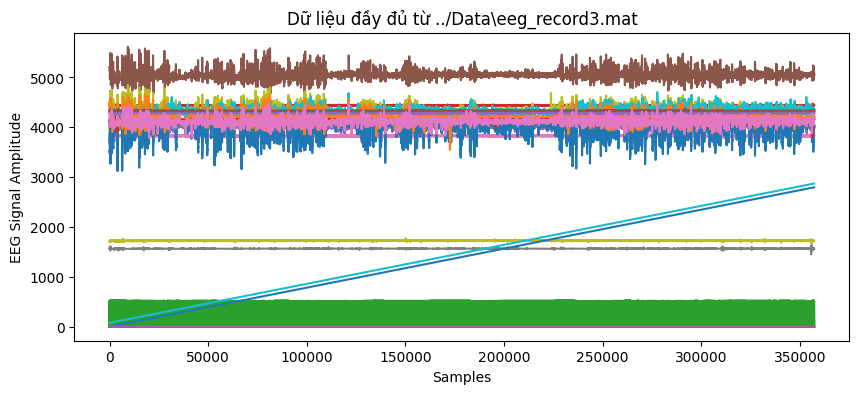


Dữ liệu EEG từ các kênh 4-17: (357224, 14)


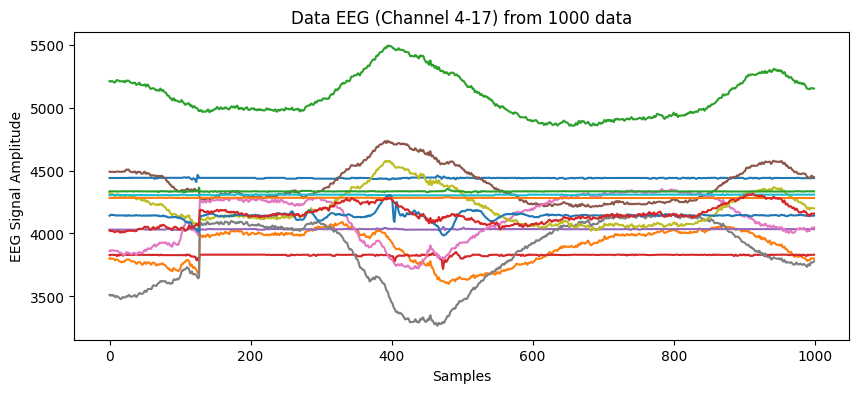


Dữ liệu EEG sau khi lọc nhiễu: (357224, 7)


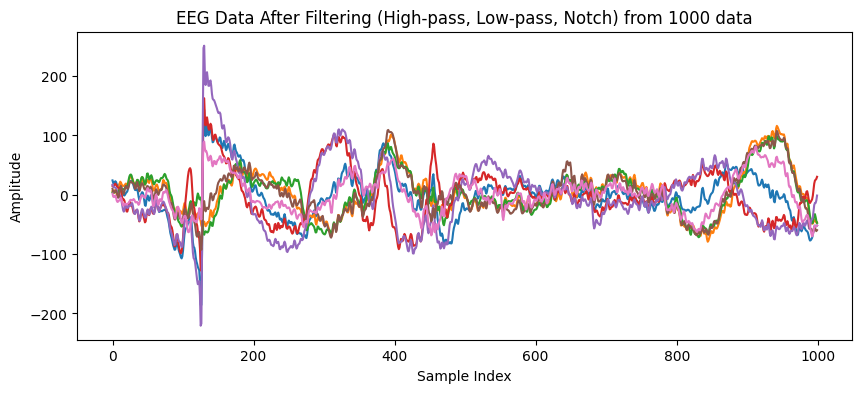

Dữ liệu đầy đủ từ file ../Data\eeg_record4.mat: (380344, 25)


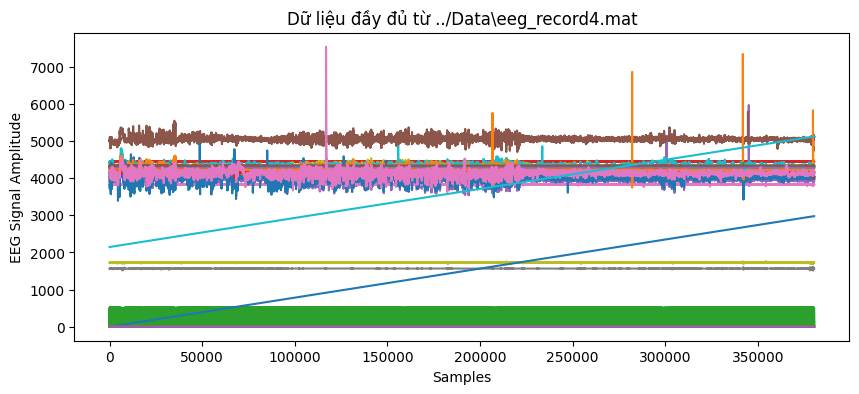


Dữ liệu EEG từ các kênh 4-17: (380344, 14)


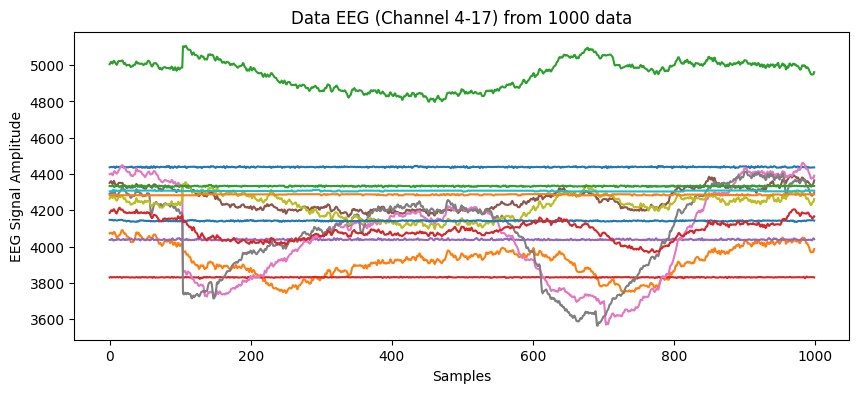


Dữ liệu EEG sau khi lọc nhiễu: (380344, 7)


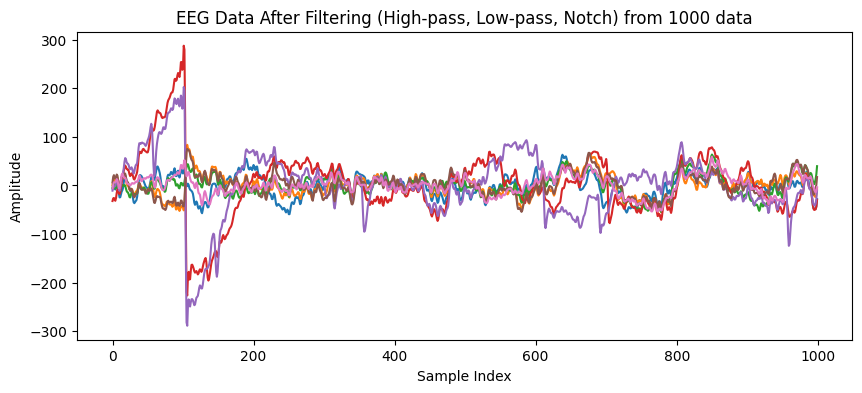

In [16]:
plot_signal(filtered_data, file_names)

Áp dụng các bộ lọc thông dải (`bandpass_filter`) để tách riêng các dải tần số cụ thể (Delta, Theta, Alpha, Beta) và trực quan hoá chúng trên 1000 samples đầu tiên.

- Dải tần số **Delta** (0.5–4 Hz) liên quan đến giấc ngủ sâu.

- Dải tần số **Theta** (4–8 Hz) liên quan đến sự thư giãn.

- Dải tần số **Alpha** (8–13 Hz) liên quan đến trạng thái thư giãn nhưng tỉnh táo.

- Dải tần số **Beta** (13–30 Hz) liên quan đến sự tập trung, căng thẳng.

In [17]:
def plot_frequency_bands(filtered_data):
    # Định nghĩa các dải tần số
    delta_low, delta_high = 0.5, 4  # Hz
    theta_low, theta_high = 4, 8  # Hz
    alpha_low, alpha_high = 8, 13  # Hz
    beta_low, beta_high = 13, 30  # Hz

    # Lọc thông dải để giữ lại các dải tần số khác nhau
    delta_band = bandpass_filter(filtered_data, delta_low, delta_high, sampFreq)
    theta_band = bandpass_filter(filtered_data, theta_low, theta_high, sampFreq)
    alpha_band = bandpass_filter(filtered_data, alpha_low, alpha_high, sampFreq)
    beta_band = bandpass_filter(filtered_data, beta_low, beta_high, sampFreq)

    # Biểu diễn tín hiệu dải delta
    plt.figure(figsize=(15, 6))
    plt.plot(delta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Delta Band (0.5-4 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải theta
    plt.figure(figsize=(15, 6))
    plt.plot(theta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Theta Band (4-8 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải alpha
    plt.figure(figsize=(15, 6))
    plt.plot(alpha_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Alpha Band (8-13 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải beta
    plt.figure(figsize=(15, 6))
    plt.plot(beta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Beta Band (13-30 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()
    

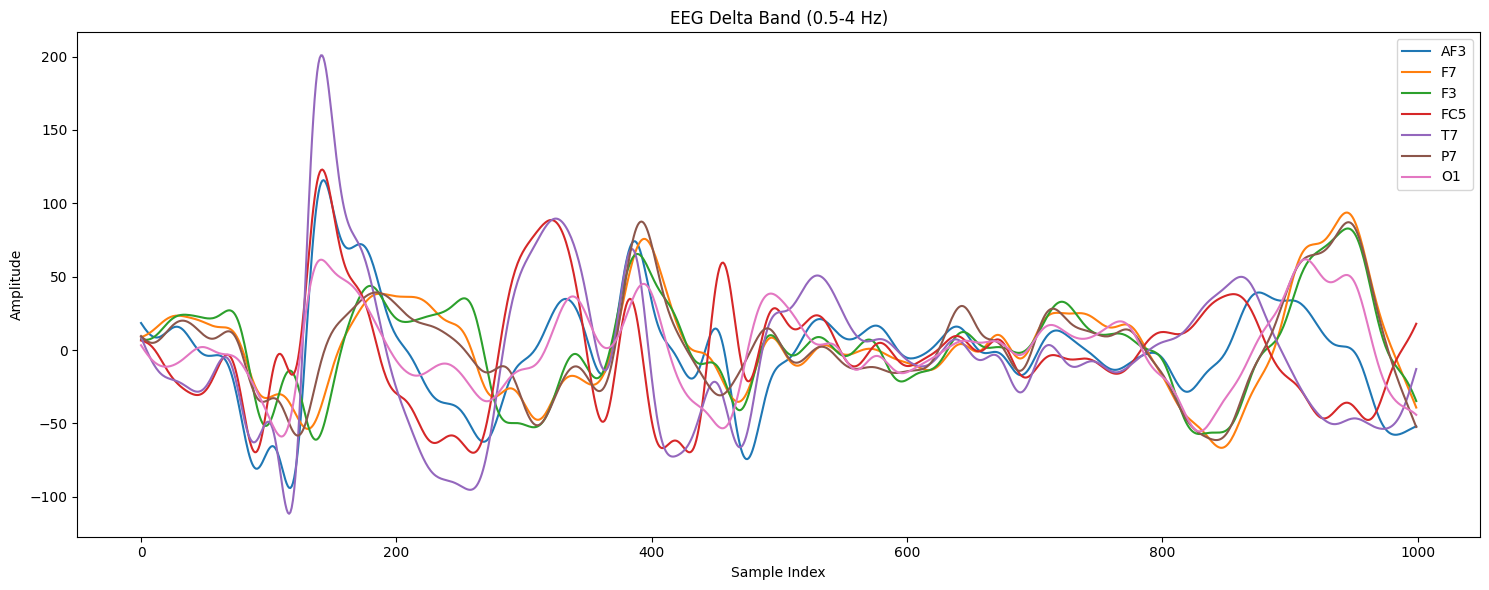

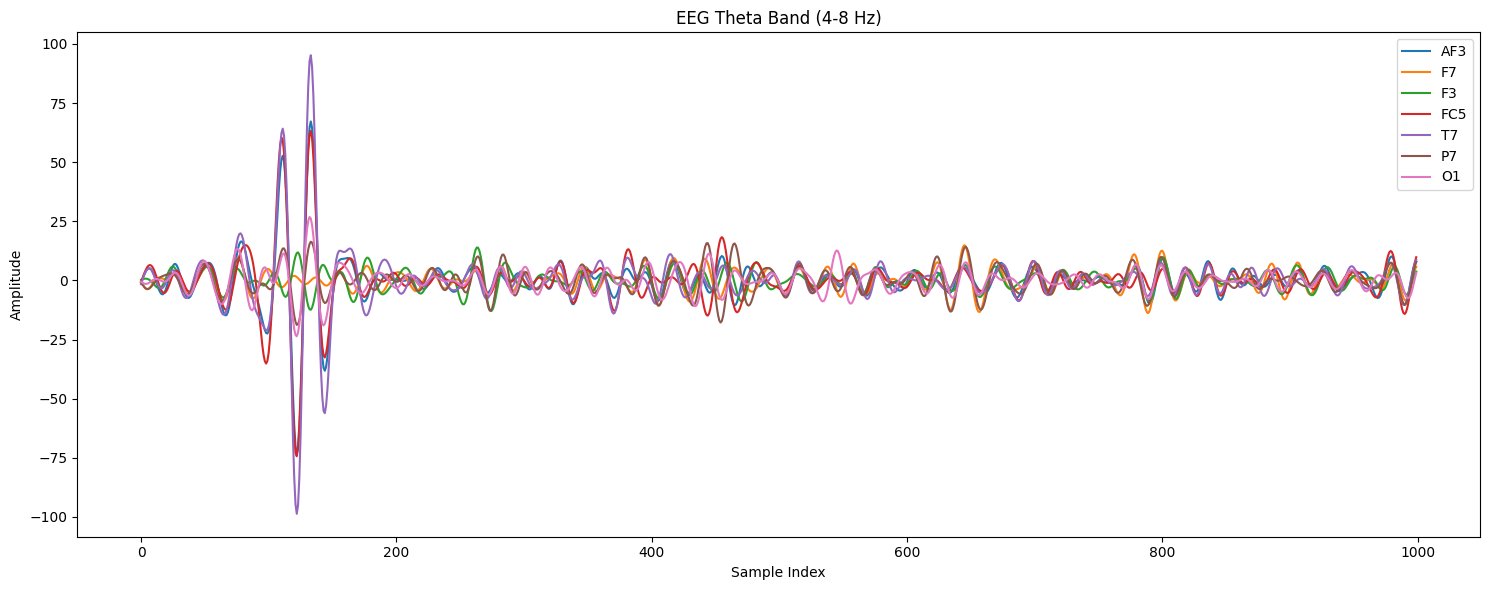

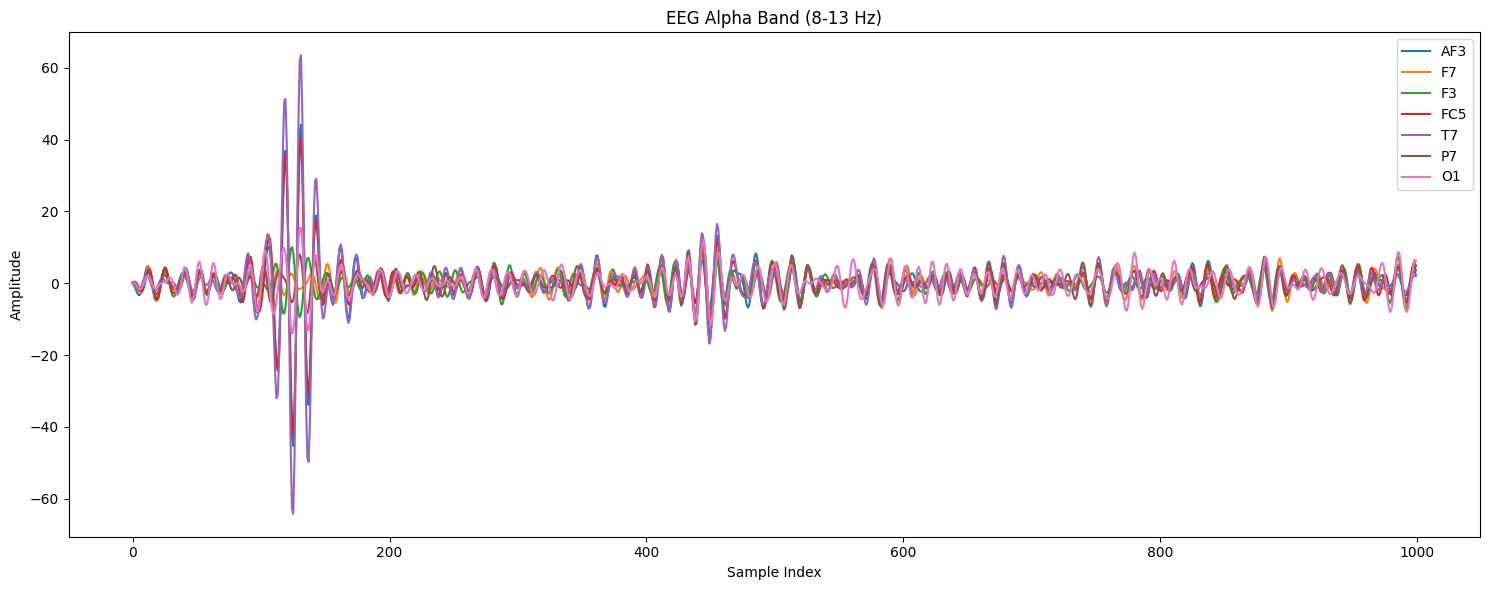

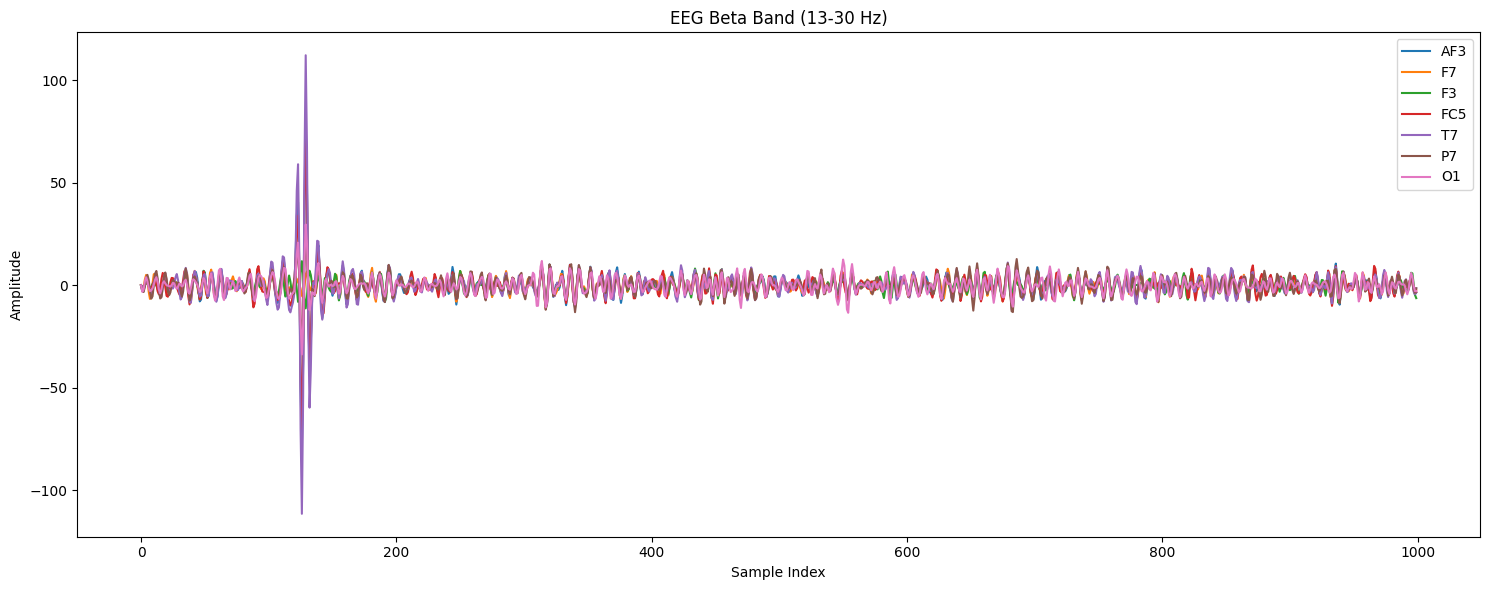

In [18]:
# Trực quan với file đầu tiên của data (file3)
plot_frequency_bands(filtered_data[0])

### **Independent Component Analysis (ICA)**

ICA là một phương pháp mạnh mẽ để tách các thành phần tín hiệu độc lập từ dữ liệu hỗn hợp. Trong bối cảnh EEG, tín hiệu thu được thường là sự kết hợp của nhiều nguồn tín hiệu, bao gồm cả nhiễu cơ học (chẳng hạn như chuyển động mắt EOG), nhiễu điện tim ECG, và tín hiệu não. ICA giúp phân tách các thành phần này, cho phép loại bỏ các nhiễu không liên quan và chỉ giữ lại các thành phần liên quan đến hoạt động não.

##### **Montage trong EEG là gì?**

- Montage trong EEG là cách các kênh điện cực được sắp xếp trên đầu của một người tham gia nghiên cứu. Nó quyết định vị trí mà các điện cực được đặt trên da đầu, từ đó ảnh hưởng đến cách tín hiệu được ghi lại và phân tích.

##### **Lưới montage 10-20 là gì?**
- Lưới montage 10-20 là một hệ thống sắp xếp tiêu chuẩn được sử dụng để gắn các điện cực lên đầu người tham gia nghiên cứu. Nó được gọi là "10-20" vì khoảng cách giữa các điện cực trong lưới này bằng 10% hoặc 20% của vòng đầu của người tham gia.

    - 10% và 20%: Độ dài của chu vi đầu người được chia thành các đoạn tương ứng 10% và 20%, và các điện cực được đặt tại những vị trí này.
    
    - Hệ thống này có tính nhất quán: Dù người tham gia có kích thước đầu khác nhau, hệ thống này vẫn giúp việc gắn điện cực được thực hiện một cách có hệ thống và dễ dàng tái tạo.

##### **Lý do sử dụng montage 10-20 trong xử lý EEG**

Montage 10-20 là hệ thống chuẩn để gắn các điện cực EEG lên đầu người tham gia nghiên cứu. Việc sử dụng montage này trong xử lý EEG có các lý do quan trọng:

1. **Xác định vị trí chính xác của các kênh**: Gán montage vào đối tượng `Raw` trong MNE giúp xác định chính xác vị trí của các tín hiệu từ các điện cực.

2. **Chuẩn hóa và tái tạo nghiên cứu**: Hệ thống 10-20 cung cấp một chuẩn mực chung, giúp so sánh kết quả nghiên cứu và đảm bảo tính nhất quán trong các phân tích EEG.

3. **Định vị các khu vực chức năng của não**: Montage giúp phân tích tín hiệu theo các vùng chức năng như:
   - **Frontal (trán)**: Nhận thức và hành vi.
   
   - **Central (đỉnh đầu)**: Cảm giác và vận động.
   
   - **Occipital (sau gáy)**: Xử lý thị giác.

Việc gán montage giúp xác định chính xác nguồn gốc tín hiệu và hỗ trợ phân tích dựa trên các vùng chức năng của não.

In [19]:
def apply_ica(filtered_data):
    ica_list = []
    raw_list = []

    for i in range(len(filtered_data)):

        data_one_day = filtered_data[i]

        '''
        Tạo thông tin cho đối tượng Raw

        mne.create_info: hàm tạo thông tin cơ bản về tín hiệu EEG, bao gồm:
        - tên các kênh (channel_names)
        - tần số lấy mẫu (sfreq)
        - loại dữ liệu (ch_types='eeg').

        '''
        
        info = mne.create_info(ch_names = useful_channel_names, sfreq = sampFreq, ch_types='eeg')

        # Lấy dữ liệu đã lọc từ danh sách, chuyển đổi thành dạng phù hợp cho MNE
        filtered_data_mne = data_one_day.T  # Chuyển thành (n_channels, n_times)

        # Tạo đối tượng Raw từ dữ liệu
        raw = mne.io.RawArray(filtered_data_mne, info)

        # Thêm montage vào đối tượng Raw với montage 'standard_1020'
        montage = mne.channels.make_standard_montage('standard_1020')
        raw.set_montage(montage)

        # Áp dụng ICA để tách các thành phần độc lập
        ica = ICA(n_components=7, random_state=42, max_iter='auto')
        ica.fit(raw)

        # Lưu ICA và Raw để sử dụng sau
        ica_list.append(ica)
        raw_list.append(raw)

        # In ra thông báo đã xử lý xong
        print(f'Đã áp dụng ICA cho dữ liệu của người thứ {i+1}')

    return ica_list, raw_list

In [20]:
# Áp dụng ICA cho filtered_data
ica_data, raw_data = apply_ica(filtered_data)

Creating RawArray with float64 data, n_channels=7, n_times=357224
    Range : 0 ... 357223 =      0.000 ...  2790.805 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 2.2s.
Đã áp dụng ICA cho dữ liệu của người thứ 1
Creating RawArray with float64 data, n_channels=7, n_times=380344
    Range : 0 ... 380343 =      0.000 ...  2971.430 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 2.1s.
Đã áp dụng ICA cho dữ liệu của người thứ 2
Creating RawArray with float64 data, n_channels=7, n_times=351204
    Range : 0 ... 351203 =      0.000 ...  2743.773 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 2.5s.
Đã áp dụng ICA cho dữ liệu của người thứ 3
Creating RawArray with float64 data, n_channels=7, n_times=288752
    Range : 0 ... 288751 =      0.000 ...  2255.867 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.2s.
Đã áp dụng ICA cho dữ liệu của người thứ 4
Creating RawArray with float64 data, n_channels=7, n_times=398816
    Range : 0 ... 398815 =      0.000 ...  3115.742 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.2s.
Đã áp dụng ICA cho dữ liệu của người thứ 5
Creating RawArray with float64 data, n_channels=7, n_times=381340
    Range : 0 ... 381339 =      0.000 ...  2979.211 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 2.3s.
Đã áp dụng ICA cho dữ liệu của người thứ 6
Creating RawArray with float64 data, n_channels=7, n_times=391624
    Range : 0 ... 391623 =      0.000 ...  3059.555 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.4s.
Đã áp dụng ICA cho dữ liệu của người thứ 7
Creating RawArray with float64 data, n_channels=7, n_times=356728
    Range : 0 ... 356727 =      0.000 ...  2786.930 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.8s.
Đã áp dụng ICA cho dữ liệu của người thứ 8
Creating RawArray with float64 data, n_channels=7, n_times=373304
    Range : 0 ... 373303 =      0.000 ...  2916.430 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.0s.
Đã áp dụng ICA cho dữ liệu của người thứ 9
Creating RawArray with float64 data, n_channels=7, n_times=345164
    Range : 0 ... 345163 =      0.000 ...  2696.586 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.1s.
Đã áp dụng ICA cho dữ liệu của người thứ 10
Creating RawArray with float64 data, n_channels=7, n_times=443972
    Range : 0 ... 443971 =      0.000 ...  3468.523 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.8s.
Đã áp dụng ICA cho dữ liệu của người thứ 11
Creating RawArray with float64 data, n_channels=7, n_times=361840
    Range : 0 ... 361839 =      0.000 ...  2826.867 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 2.0s.
Đã áp dụng ICA cho dữ liệu của người thứ 12
Creating RawArray with float64 data, n_channels=7, n_times=333236
    Range : 0 ... 333235 =      0.000 ...  2603.398 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.1s.
Đã áp dụng ICA cho dữ liệu của người thứ 13
Creating RawArray with float64 data, n_channels=7, n_times=396812
    Range : 0 ... 396811 =      0.000 ...  3100.086 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.6s.
Đã áp dụng ICA cho dữ liệu của người thứ 14
Creating RawArray with float64 data, n_channels=7, n_times=336280
    Range : 0 ... 336279 =      0.000 ...  2627.180 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.0s.
Đã áp dụng ICA cho dữ liệu của người thứ 15
Creating RawArray with float64 data, n_channels=7, n_times=360928
    Range : 0 ... 360927 =      0.000 ...  2819.742 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.8s.
Đã áp dụng ICA cho dữ liệu của người thứ 16
Creating RawArray with float64 data, n_channels=7, n_times=415164
    Range : 0 ... 415163 =      0.000 ...  3243.461 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 2.0s.
Đã áp dụng ICA cho dữ liệu của người thứ 17
Creating RawArray with float64 data, n_channels=7, n_times=363232
    Range : 0 ... 363231 =      0.000 ...  2837.742 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.2s.
Đã áp dụng ICA cho dữ liệu của người thứ 18
Creating RawArray with float64 data, n_channels=7, n_times=347548
    Range : 0 ... 347547 =      0.000 ...  2715.211 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 7 components
Fitting ICA took 1.1s.
Đã áp dụng ICA cho dữ liệu của người thứ 19
Creating RawArray with float64 data, n_channels=7, n_times=214540
    Range : 0 ... 214539 =      0.000 ...  1676.086 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.6s.
Đã áp dụng ICA cho dữ liệu của người thứ 20
Creating RawArray with float64 data, n_channels=7, n_times=428848
    Range : 0 ... 428847 =      0.000 ...  3350.367 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.9s.
Đã áp dụng ICA cho dữ liệu của người thứ 21
Creating RawArray with float64 data, n_channels=7, n_times=483732
    Range : 0 ... 483731 =      0.000 ...  3779.148 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.6s.
Đã áp dụng ICA cho dữ liệu của người thứ 22
Creating RawArray with float64 data, n_channels=7, n_times=483376
    Range : 0 ... 483375 =      0.000 ...  3776.367 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.7s.
Đã áp dụng ICA cho dữ liệu của người thứ 23
Creating RawArray with float64 data, n_channels=7, n_times=408976
    Range : 0 ... 408975 =      0.000 ...  3195.117 secs
Ready.
Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components


C:\Users\HP\AppData\Local\Temp\ipykernel_14388\334926415.py:33: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.1s.
Đã áp dụng ICA cho dữ liệu của người thứ 24


Hàm `plot_ica_components` dùng để vẽ các thành phần ICA (được tính từ các đối tượng ICA đã áp dụng vào dữ liệu EEG) cho một số lượng file nhất định, và hiển thị tín hiệu của các thành phần này khi áp dụng lên dữ liệu gốc (Raw data).

In [21]:
def plot_ica_components(ica_list, raw_list, num_files=2, start_index=2, step=7):
    """
        ica_list: danh sách các đối tượng ICA đã được tính toán cho mỗi file dữ liệu EEG. 
                  Mỗi đối tượng trong danh sách này chứa các thành phần ICA (các nguồn độc lập) được tách ra từ dữ liệu.
        raw_list: danh sách các đối tượng Raw (dữ liệu EEG thô) tương ứng với các file trong ica_list. 
                  Mỗi đối tượng Raw chứa dữ liệu EEG đã thu thập từ một người tại một thời điểm cụ thể.
        
        start_index (int): Chỉ số file bắt đầu. Mặc định là 2 (từ file thứ 3).
        step (int): Bước nhảy giữa các file. Mặc định là 7.

    """
    # Tính chỉ số các file cần vẽ
    indices_to_plot = [start_index + i * step for i in range(num_files)]

    for idx in indices_to_plot:
        if idx >= len(ica_list):  # Trường hợp chỉ số không hợp lệ
            print(f'Chỉ số file {idx + 1} vượt quá số lượng file trong danh sách.')
            continue  
        #Trường hợp chỉ số hợp lệ
        print(f'Vẽ các thành phần ICA cho file thứ {idx + 1}')

        # Vẽ các thành phần ICA
        ica_list[idx].plot_components()

        # Vẽ tín hiệu của các thành phần ICA với Raw data
        ica_list[idx].plot_sources(raw_list[idx], start=0, stop=40, show_scrollbars=False)

        plt.show()

Vẽ các thành phần ICA cho file thứ 3


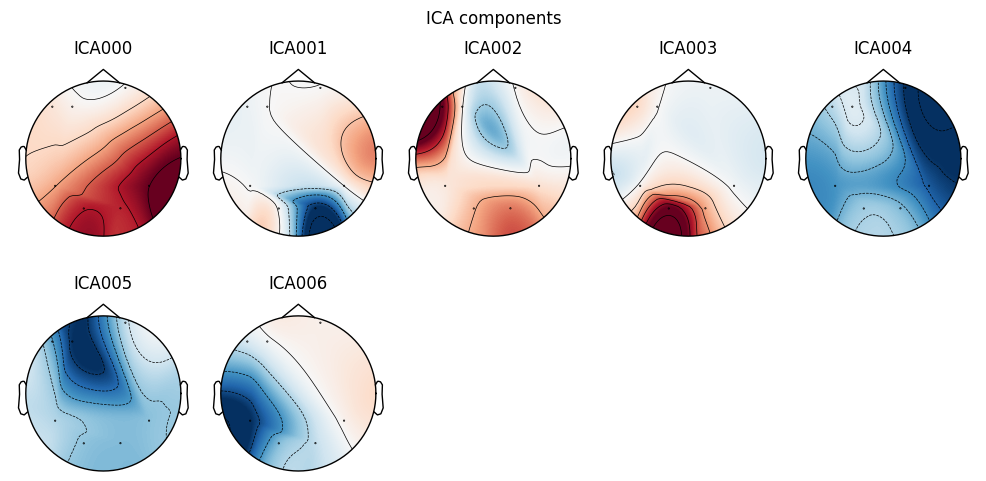

Creating RawArray with float64 data, n_channels=7, n_times=351204
    Range : 0 ... 351203 =      0.000 ...  2743.773 secs
Ready.
Using matplotlib as 2D backend.


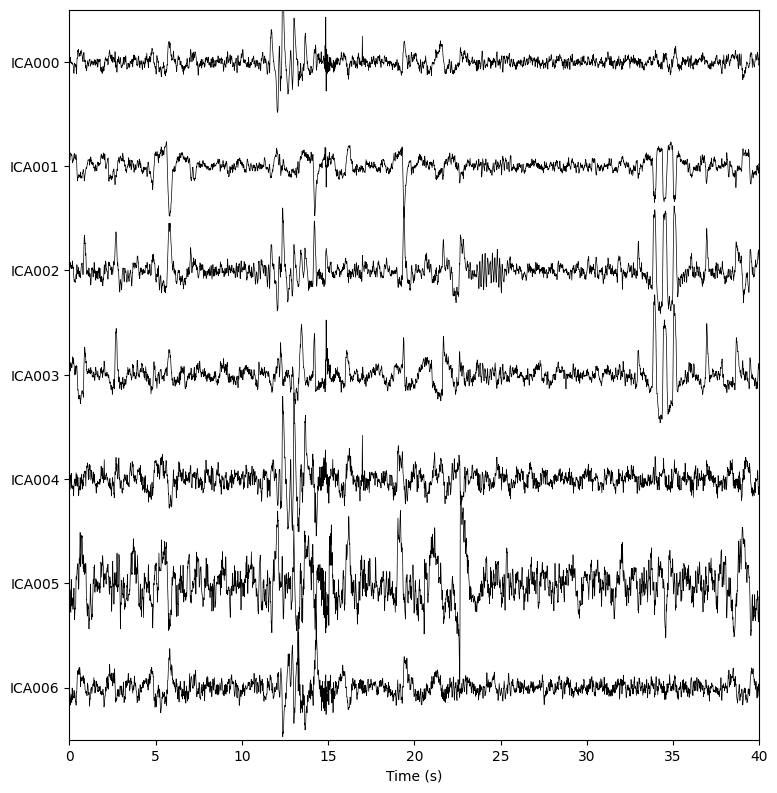

Vẽ các thành phần ICA cho file thứ 10


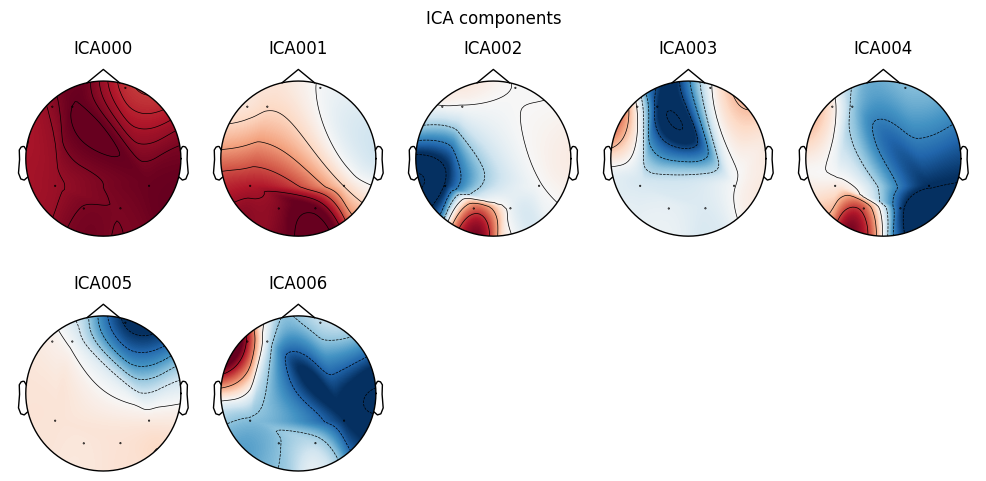

Creating RawArray with float64 data, n_channels=7, n_times=345164
    Range : 0 ... 345163 =      0.000 ...  2696.586 secs
Ready.


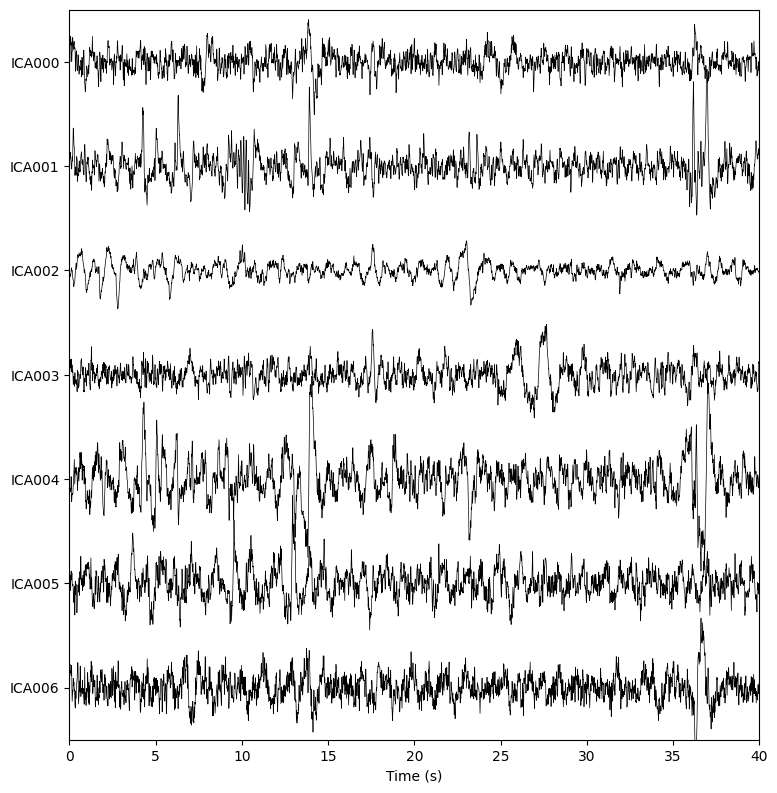

In [22]:
plot_ica_components(ica_data, raw_data)

**Phát hiện nhiễu EOG và ECG**
* **EOG artifacts:** Các tín hiệu EOG phát sinh khi mắt chuyển động (ví dụ, nháy mắt hoặc chuyển động mắt theo hướng khác) gây ra dòng điện nhỏ có thể ghi nhận được trên da gần mắt. Các tín hiệu này có thể ảnh hưởng đến tín hiệu EEG, làm cho việc phân tích sóng não trở nên khó khăn hơn.

* **ECG artifacts:** Các nhiễu ECG xuất hiện khi tín hiệu của tim (bao gồm các sóng điện học phát sinh từ hoạt động của tim) xâm nhập vào các kênh EEG. Những nhiễu này có thể làm méo tín hiệu não và cần được phát hiện và loại bỏ.

In [23]:
def detect_eog_artifacts(ica, raw, eye_channels):
    # Lưu trữ các indices của các thành phần ICA mà gây ra nhiễu EOG cho từng eye_channels.
    all_eog_indices = {} 

    for ch in eye_channels:
        if ch in raw.ch_names:  # Kiểm tra nếu kênh có tồn tại trong đối tượng Raw
            try:
                # Phát hiện nhiễu nháy mắt (EOG)
                eog_indices, _ = ica.find_bads_eog(raw, ch_name=ch)
                all_eog_indices[ch] = eog_indices
                # print(f"Các thành phần ICA liên quan đến nháy mắt với kênh {ch}: {eog_indices}")
            except Exception as e:
                print(f"Lỗi khi chạy với kênh {ch}: {e}")

    return all_eog_indices

def detect_ecg_artifacts(ica, raw, heart_related_channels):
    all_ecg_indices = {}

    for ch in heart_related_channels:
        if ch in raw.ch_names:  # Kiểm tra nếu kênh có tồn tại trong đối tượng Raw
            try:
                # Phát hiện nhiễu nhịp tim (ECG)
                ecg_indices, _ = ica.find_bads_ecg(raw, ch_name=ch)
                all_ecg_indices[ch] = ecg_indices
                # print(f"Các thành phần ICA liên quan đến nhịp tim với kênh {ch}: {ecg_indices}")
            except Exception as e:
                print(f"Lỗi khi chạy với kênh {ch}: {e}")

    return all_ecg_indices

def print_indices_results(all_eog_indices, all_ecg_indices):
    # In kết quả EOG
    print("\nKết quả từ tất cả các kênh EOG:")
    for ch, indices in all_eog_indices.items():
        print(f"Kênh {ch}: Thành phần ICA {indices}")

    # In kết quả ECG
    print("\nKết quả từ tất cả các kênh ECG:")
    for ch, indices in all_ecg_indices.items():
        print(f"Kênh {ch}: Thành phần ICA {indices}")

Trong quá trình xử lý tín hiệu EEG, nhiễu từ các yếu tố bên ngoài như chuyển động mắt (EOG) và hoạt động tim (ECG) có thể làm méo tín hiệu não và gây khó khăn trong việc phân tích các đặc trưng của sóng não. Để cải thiện chất lượng tín hiệu EEG, nhóm em đã áp dụng phương pháp ICA để phát hiện và loại bỏ các nhiễu này. Các kênh được chọn để phát hiện nhiễu liên quan đến mắt và tim được xác định dựa trên đặc điểm sinh lý học của chúng.

Các kênh phổ biến liên quan đến chuyển động mắt bao gồm:

* **`AF4`**: Kênh gần vùng trán có thể ghi nhận tín hiệu khi mắt chuyển động.

* **`F7`**: Kênh gần vùng thái dương, nơi có thể ghi nhận sự thay đổi điện thế khi mắt chuyển động.

* **`F3`**: Kênh gần khu vực vỏ não phía trước, nơi cũng có thể ghi nhận các tín hiệu từ chuyển động mắt.

Những kênh này được chọn vì chúng gần các vùng có thể bị ảnh hưởng trực tiếp bởi sự chuyển động của mắt, do đó giúp phát hiện và loại bỏ nhiễu EOG hiệu quả hơn.

Nhóm em nhận thấy rằng các kênh được chọn không có sự can thiệp đáng kể từ hoạt động của tim trong quá trình khảo sát các kênh EEG. Các kênh EEG được giữ lại bao gồm: **F7**, **F3**, **P7**, **O1**, **O2**, **P8**, và **AF4** - những kênh này ít bị nhiễu từ tín hiệu ECG, giúp đảm bảo tính chính xác của phân tích và tập trung vào các tín hiệu não bộ, từ đó nâng cao độ tin cậy trong việc đánh giá các trạng thái chú ý tinh thần.

In [24]:
def detect_artifacts(ica_list, raw_list):
    # Danh sách các kênh bị ảnh hưởng nhiễu từ mắt và tim
    eye_channels = ['AF4', 'F7', 'F3']
    heart_channels = []
    # Khởi tạo danh sách lưu trữ các chỉ số thành phần ICA nhiễu EOG và ECG
    eog_indices = []
    ecg_indices = []

    # Duyệt qua từng file trong raw_list và ica_list
    for i in range(len(raw_list)):  # mỗi đối tượng Raw trong raw_list sẽ tương ứng với một đối tượng ICA trong ica_list.
        print(f"\nKết quả cho file #{i + 1}:")
        
        # Phát hiện nhiễu EOG và ECG cho từng file
        eog = detect_eog_artifacts(ica_list[i], raw_list[i], eye_channels)
        ecg = detect_ecg_artifacts(ica_list[i], raw_list[i], heart_channels)

        eog_indices.append(eog)
        ecg_indices.append(ecg)

    return eog_indices, ecg_indices

In [25]:
eog_indices, ecg_indices = detect_artifacts(ica_data, raw_data)


Kết quả cho file #1:
Using EOG channel: AF4
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff f

In [26]:
def get_artifacts_table(eog_indices, ecg_indices, data_type="EOG"):
    # Dữ liệu sẽ chứa thông tin từng chỉ số ICA bị nhiễu cho các kênh
    artifact_data = {channel: [] for channel in useful_channel_names}

    # Duyệt qua từng file để lấy các chỉ số ICA nhiễu
    for artifact in (eog_indices if data_type == "EOG" else ecg_indices):
        for channel in useful_channel_names:
            # Lấy các thành phần ICA bị nhiễu cho kênh này
            artifact_data[channel].append(artifact.get(channel, []))

    # Chuyển thành DataFrame
    artifact_df = pd.DataFrame(artifact_data)

    # Trả về bảng kết quả
    return artifact_df.transpose()  # Trả về DataFrame với mỗi file là một cột

# In kết quả EOG
eog_full_df = get_artifacts_table(eog_indices, ecg_indices, data_type="EOG")
print("Các chỉ số ICA bị nhiễu mắt (EOG) - Dữ liệu đầy đủ:")
print(eog_full_df)

# In kết quả ECG 
ecg_full_df = get_artifacts_table(eog_indices, ecg_indices, data_type="ECG")
print("\nCác chỉ số ICA bị nhiễu tim (ECG) - Dữ liệu đầy đủ:")
print(ecg_full_df)

Các chỉ số ICA bị nhiễu mắt (EOG) - Dữ liệu đầy đủ:
     0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  19  20  \
F7   []  []  []  []  []  []  []  []  []  []  ...  []  []  []  []  []  []  []   
F3   []  []  []  []  []  []  []  []  []  []  ...  []  []  []  []  []  []  []   
P7   []  []  []  []  []  []  []  []  []  []  ...  []  []  []  []  []  []  []   
O1   []  []  []  []  []  []  []  []  []  []  ...  []  []  []  []  []  []  []   
O2   []  []  []  []  []  []  []  []  []  []  ...  []  []  []  []  []  []  []   
P8   []  []  []  []  []  []  []  []  []  []  ...  []  []  []  []  []  []  []   
AF4  []  []  []  []  []  []  []  []  []  []  ...  []  []  []  []  []  []  []   

     21  22  23  
F7   []  []  []  
F3   []  []  []  
P7   []  []  []  
O1   []  []  []  
O2   []  []  []  
P8   []  []  []  
AF4  []  []  []  

[7 rows x 24 columns]

Các chỉ số ICA bị nhiễu tim (ECG) - Dữ liệu đầy đủ:
     0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  19  20  \
F7   []

Sau khi áp dụng phương pháp ICA để phát hiện nhiễu EOG và ECG từ các kênh EEG, kết quả thu được như sau:

- **Nhiễu EOG**: Không có chỉ số ICA nào bị nhiễu EOG trong các kênh EEG đã chọn (F7, F3, P7, O1, O2, P8, AF4). Điều này cho thấy các kênh này ít bị ảnh hưởng bởi chuyển động mắt, giúp tín hiệu sạch hơn và phân tích sóng não chính xác hơn.

- **Nhiễu ECG**: Các kênh EEG cũng không bị nhiễu ECG đáng kể, duy trì chất lượng tín hiệu ổn định và không bị ảnh hưởng bởi tín hiệu tim.

Tiếp theo, nhóm em đã sử dụng hàm `exclude_ica_components` để loại trừ các thành phần ICA không mong muốn.

* Hàm này nhận vào danh sách các đối tượng `ICA` và `Raw`, cũng như các chỉ số thành phần ICA bị nhiễu do EOG và ECG. 

* Sau khi tổng hợp các chỉ số ICA bị nhiễu từ tín hiệu mắt và tim, hàm loại trừ các thành phần này khỏi quá trình phân tích.

Tuy nhiên, đối với trường hợp này thì **không** có chỉ số ICA nào bị nhiễu **EOG** và **ECG**.

In [27]:
def exclude_ica_components(ica_list, raw_list, eog_indices_list, ecg_indices_list):
    excluded_raw_list = []
    excluded_ica_list = []

    for idx, (ica, raw, eog_indices, ecg_indices) in enumerate(zip(ica_list, raw_list, eog_indices_list, ecg_indices_list)):
        print(f"\nLoại bỏ thành phần ICA cho file #{idx + 1}:")

        # Tổng hợp các thành phần ICA bị nhiễu
        exclude_indices = set()
        for eog in eog_indices.values():
            exclude_indices.update(eog)
        for ecg in ecg_indices.values():
            exclude_indices.update(ecg)

        # Cập nhật danh sách loại trừ trong ICA
        ica.exclude = list(exclude_indices)
        print(f"Đã loại bỏ các thành phần ICA: {ica.exclude}")

        # Tạo bản sao Raw để áp dụng loại trừ mà không làm thay đổi dữ liệu gốc
        raw_copy = raw.copy()
        ica.apply(raw_copy)

        # Lưu lại dữ liệu đã loại trừ
        excluded_raw_list.append(raw_copy)
        excluded_ica_list.append(ica) 
        print(f"Đã loại trừ thành công cho file #{idx + 1}")
    
    return excluded_raw_list, excluded_ica_list


excluded_raw, excluded_ica = exclude_ica_components(ica_data, raw_data, eog_indices, ecg_indices)


Loại bỏ thành phần ICA cho file #1:
Đã loại bỏ các thành phần ICA: []
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 0 ICA components
    Projecting back using 7 PCA components
Đã loại trừ thành công cho file #1

Loại bỏ thành phần ICA cho file #2:
Đã loại bỏ các thành phần ICA: []
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 0 ICA components
    Projecting back using 7 PCA components
Đã loại trừ thành công cho file #2

Loại bỏ thành phần ICA cho file #3:
Đã loại bỏ các thành phần ICA: []
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 0 ICA components
    Projecting back using 7 PCA components
Đã loại trừ thành công cho file #3

Loại bỏ thành phần ICA cho file #4:
Đã loại bỏ các thành phần ICA: []
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 0 ICA components
    Projecting back using 7 PCA components
Đã loại trừ

In [66]:
# Lưu dữ liệu vào một dictionary với keys là 'file_1', 'file_2', ...
data_ICA = {}

for idx, raw in enumerate(excluded_raw):
    file_key = f"file_{idx + 1}"  # Key cho từng file (file_1, file_2, ...)
    data_ICA[file_key] = raw.get_data().T  # Lưu dữ liệu của file vào dictionary

In [67]:
# In thử data của 1 người (5 file)
data_ICA['file_1']

array([[24.1974972 ,  6.00084406,  4.23830338, ..., 16.96838111,
        10.22124612,  1.91832998],
       [19.7212799 ,  2.85110055,  3.29300673, ..., 14.33737554,
         5.44073456, -3.05514875],
       [19.06793926,  3.39232986,  3.41850969, ..., 12.97791361,
         3.86129933, -3.88041594],
       ...,
       [12.42305188, 18.81125479,  7.11168582, ..., 13.91258821,
        12.92372267,  6.00828526],
       [ 8.8658258 , 14.07675821,  6.68788509, ..., 11.32867891,
        10.06841613,  4.72079507],
       [ 2.85255593,  5.58936839,  2.624822  , ...,  1.51582002,
         5.10406494,  3.4232087 ]])

## **Feature Engineering**

* Đánh nhãn các trạng thái (Focused, Unfocused, Drowsy) cho dữ liệu 

In [69]:
def restructure_data(data_ICA, num_people=5, num_files_per_subject=5):
    # Tạo từ điển để lưu trữ dữ liệu
    data_dict = {state: {} for state in ['Focused', 'Unfocused', 'Drowsy']}

    # Định nghĩa số mẫu cho mỗi khoảng thời gian
    samples_per_minute = sampFreq * 60
    samples_10_minutes = samples_per_minute * 10
    samples_20_minutes = samples_per_minute * 20

    # Chia dữ liệu theo từng người và trạng thái
    for person_idx in range(num_people):
        start_file_idx = person_idx * num_files_per_subject
        num_files = num_files_per_subject if person_idx != num_people - 1 else num_files_per_subject - 1

        # Tạo danh sách để lưu trữ dữ liệu từng trạng thái cho mỗi người
        person_data = {state: [] for state in ['Focused', 'Unfocused', 'Drowsy']}

        for file_idx in range(start_file_idx, start_file_idx + num_files):
            file_key = f"file_{file_idx + 1}"
            data = data_ICA[file_key]

            # Chia dữ liệu thành 3 phần dựa trên trạng thái
            person_data['Focused'].append(data[:samples_10_minutes, :])
            person_data['Unfocused'].append(data[samples_10_minutes:samples_20_minutes, :])
            person_data['Drowsy'].append(data[samples_20_minutes:, :])

        # Ghép tất cả các file lại thành một mảng duy nhất cho mỗi trạng thái
        subject_key = f"subject_{person_idx + 1}"
        for state in person_data:
            data_dict[state][subject_key] = np.concatenate(person_data[state], axis=0)

    return data_dict


In [70]:
data_dict = restructure_data(data_ICA)

### **Extract Features**

In [92]:
# 1. Hàm tạo cửa sổ Blackman-Harris
def blackman_harris_window(M=128):
    t_win = np.arange(0, M)
    window_blackman = 0.42 - 0.5 * np.cos((2 * np.pi * t_win) / (M - 1)) + 0.08 * np.cos((4 * np.pi * t_win) / (M - 1))
    return window_blackman

In [93]:
# 2. Hàm tính STFT và công suất phổ
def compute_stft_power(data, fs, window, nperseg, nfft=1024):
    f, t, Zxx = stft(data, fs=fs, window=window, nperseg=nperseg, noverlap=0, nfft=nfft,
                     detrend=False, return_onesided=True, boundary='zeros', padded=True)
    power = (np.abs(Zxx)) ** 2
    # Thêm chiều kênh nếu chỉ có 2 chiều (Đảm bảo kết quả có 3 chiều: num_channels, num_frequencies, num_segments)
    return power[np.newaxis, :, :] if power.ndim == 2 else power

In [94]:
# 3. Hàm tính trung bình dải tần 0.5Hz
def average_power_by_band(power, fs, bands):
    if len(power.shape) < 3:
        raise ValueError("Input 'power' phải có ít nhất 3 chiều: (num_channels, num_frequencies, num_segments)")

    num_channels, num_frequencies, num_segments = power.shape
    
    freqs = np.linspace(0, fs / 2, num_frequencies)  # Các tần số tương ứng với các bin
    band_power = np.zeros((num_channels, len(bands), num_segments))

    for band_idx, (band_name, (low_freq, high_freq)) in enumerate(bands.items()):
        # Xác định chỉ số các tần số trong khoảng dải tần
        band_indices = np.where((freqs >= low_freq) & (freqs < high_freq))[0]
        if len(band_indices) == 0:
            raise ValueError(f"Không tìm thấy frequency bins cho dải tần số {band_name}. Kiểm tra phạm vi dải tần số.")
        # Tính trung bình trên các chỉ số dải tần
        band_power[:, band_idx, :] = np.mean(power[:, band_indices, :], axis=1)

    return band_power

In [95]:
# 4. Hàm tính trung bình di động trên cửa sổ 15 giây
def moving_average_window(data, window_size=15):
    num_segments = data.shape[2] - window_size + 1
    averaged_data = np.zeros((data.shape[0], data.shape[1], num_segments))
    for chn in range(data.shape[0]):
        for j in range(num_segments):
            averaged_data[chn, :, j] = np.average(data[chn, :, j:j + window_size], axis=1)
    return averaged_data

In [ ]:
# 5. Hàm chuyển đổi dữ liệu thành vector đặc trưng
def create_model_features(power_ave):
    num_channels, num_bins, num_segments = power_ave.shape

    model_features = np.zeros((num_channels * num_bins, num_segments))
    for j in range(num_segments):
        model_features[:, j] = power_ave[:, :, j].reshape(-1)

    # Áp dụng logarit cho dữ liệu
    model_features = 10 * np.log(model_features)
    return model_features

In [ ]:
# 6. Hàm trích xuất đặc trưng từ dữ liệu
def extract_features(data_dict, fs=128, nperseg=128, window_size=15):
    trail_names = list(data_dict['Focused'].keys())
    window = blackman_harris_window(M=nperseg)
    bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}

    # Khởi tạo từ điển để lưu các đặc trưng
    state_data = {'Focused': {}, 'Unfocused': {}, 'Drowsy': {}}

    for state in state_data.keys():
        for name in trail_names:
            # Tính STFT và công suất phổ
            state_power = [
                compute_stft_power(data_dict[state][name][:, i], fs, window, nperseg)
                for i in range(data_dict[state][name].shape[1])
            ]
            # Ghép các phân đoạn thành một mảng
            state_power = np.concatenate(state_power, axis=0)
            # Tính công suất trung bình theo dải tần
            state_bin = average_power_by_band(state_power, fs, bands)
            # Trung bình di động
            state_ave = moving_average_window(state_bin, window_size=window_size)
            # Chuyển đổi thành vector đặc trưng
            state_data[state][name] = create_model_features(state_ave)

    return (
        state_data['Focused'],
        state_data['Unfocused'],
        state_data['Drowsy']
    )


In [105]:
model_data_focus, model_data_unfocus, model_data_drowsy = extract_features(data_dict)

### **Compare Features**

## **Model Development**